In [36]:
#Let us import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#Let us import the dataset using pandas read function
titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [4]:
#To have a explantory details about the data we shall use the info () as it will give us the number of entries made, memory usage and also about the datatypes in the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
embarked    889 non-null object
deck        203 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [8]:
#Let's find the missing value and also its percentage

titanic.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [9]:
def missing_percentage(titanic):
    total=titanic.isnull().sum().sort_values(ascending=False)
    percent=round(titanic.isnull().sum().sort_values(ascending=False)/len(titanic)*100,2)
    return pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [11]:
missing_percentage(titanic)

,Total,Percent
deck,688,77.22
age,177,19.87
embarked,2,0.22
fare,0,0.00
parch,0,0.00
sibsp,0,0.00
sex,0,0.00
pclass,0,0.00
survived,0,0.00


In [12]:
#As part of this project I want to explore answers to following questions.
#How Survival is correlated to other attributes of the dataset ? Findout Pearson’s r.
#Did Sex play a role in Survival?
#Did class played role in survival?


In [13]:
titanic.corr(method='pearson')

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [14]:
# Infrence: "Survival is inversly correlated to Pclass value and also Age and Survival are slighltly correlated. This takes us to the second question"

In [15]:
#Let's find out how Sex play a role in Survival?

Text(0.5, 1, 'Count of Passengers who survived')

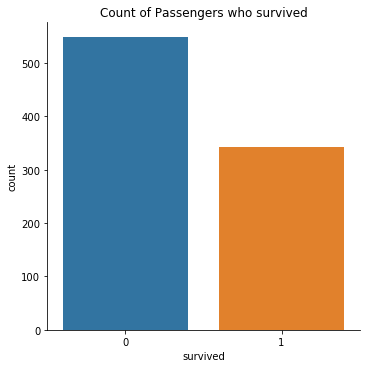

In [29]:
#titanic.groupby(['survived']).hist()
sns.factorplot('survived', data=titanic, kind='count')
plt.title('Count of Passengers who survived')

In [22]:
#Age wise Distribution of Male and Female passengers

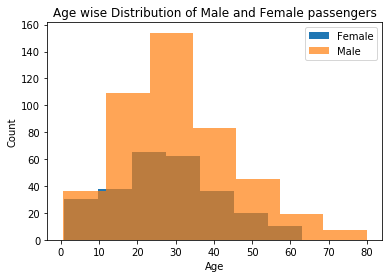

In [42]:
plt.hist(titanic['age'][(titanic['sex'] == 'female')].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(titanic['age'][(titanic['sex'] == 'male')].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female passengers')
plt.legend()

In [45]:
#There were many male passengers aboared compared to female passengers.

In [44]:
#Lets do a Age wise Distribution of Male and Female survivors

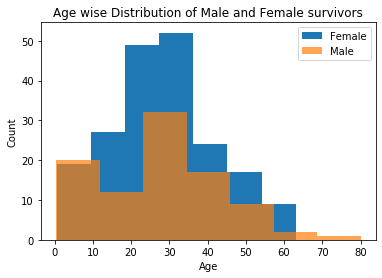

In [47]:
plt.hist(titanic['age'][(titanic['sex'] == 'female') & (titanic['survived'] == 1)].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(titanic['age'][(titanic['sex'] == 'male') & (titanic['survived'] == 1)].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female survivors')
plt.legend()

In [48]:
#It is evident that Women had better survival chance

In [49]:
#Did class played role in survival 

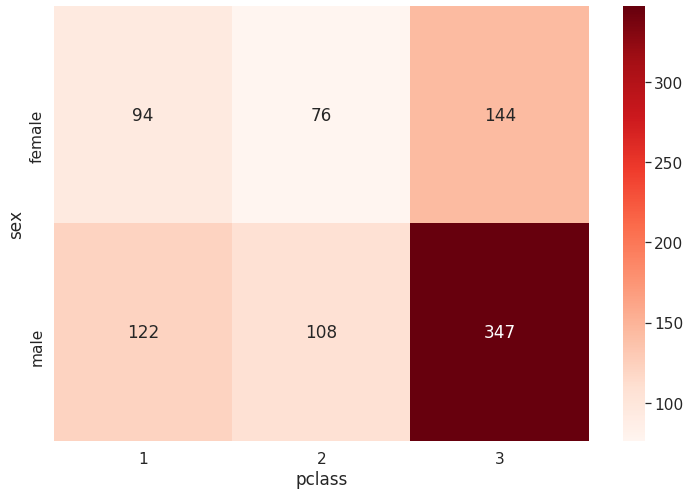

In [52]:
pd.crosstab(titanic.sex,titanic.pclass)

plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(pd.crosstab(titanic.sex,titanic.pclass), annot=True, fmt='d', cmap="Reds", vmax=None)
plt.show()

In [53]:
#Lets calculate the survival rate percent class wise

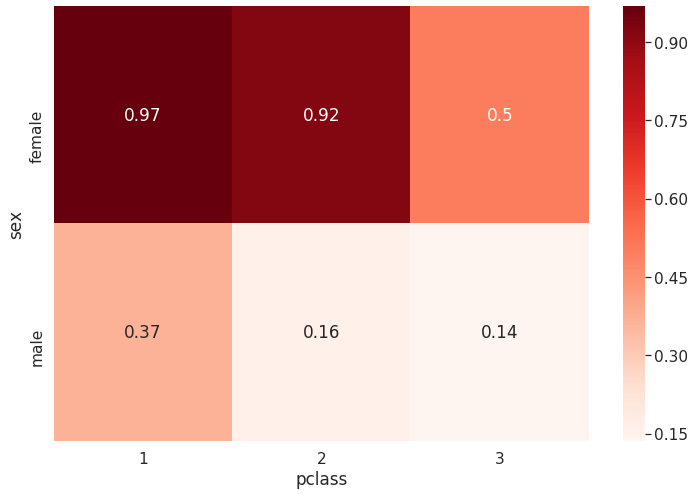

In [57]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(pd.crosstab(titanic.sex, titanic.pclass, values=titanic.survived, aggfunc="mean"), annot=True, cmap="Reds")
plt.show()


In [58]:
#It is evident that the female passengers from pclass 1 who had paid higher fare had hightest survival rate.

In [59]:
#Conclusion: 
#From my exploratory analysis of Titanic dataset we conclude that, women had higher chances of survival
#We can do a t test to come up with chances(probability) of survival.
#I also see that Class(Socio-Economic status) of the passengers had played a role in their survival
#This is not in any form a exhaustive study. More can be done on this data set.
